# Задание P1: Эффективная размерность

## Описание задачи

В этом задании вам предстоит реализовать метод "крутого склона" для определения оптимальной размерности данных при использовании PCA (метода главных компонент).

## Теоретическая основа

1. **PCA и сингулярные значения**:
   - Работаем с сингулярными значениями σ₁ ≥ σ₂ ≥ ... ≥ σₙ матрицы признакового описания X
   - Эти значения получаются через SVD-разложение: `u, s, vh = np.linalg.svd(X)`, где `s` содержит сингулярные значения

2. **Метод крутого склона**:
   - Определяем характеристику:  
     $$E_m = \frac{\sigma_{m+1} + ... + \sigma_n}{\sigma_1 + ... + \sigma_n}$$
   - Ищем точку резкого уменьшения Eₘ (крутой спад на графике)

## Постановка задачи

1. Загрузите данные из файла (используйте `np.load`)
2. Реализуйте функцию Eₘ, вычисляющую указанную характеристику
3. Найдите минимальное m, при котором Eₘ < 0.2
   - Учтите, что m начинается с 1 (не с 0)

## Технические детали

- Для SVD-разложения используйте `numpy.linalg.svd()`
- Функция возвращает 3 значения: `u, s, vh`, где `s` - массив сингулярных чисел
- Исходная матрица представлена в классическом виде (по строкам)


## Примечания

1. Метод основан на предположении о линейности данных
2. Порог 0.2 можно регулировать в зависимости от задачи
3. Для визуализации можно построить график Eₘ(m)

array([[ 1.09706398, -2.07333501,  1.26993369, ..., -1.56846633,
        -2.30360062, -2.75062224],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  0.82696245,
        -1.53512599,  0.24388967],
       [ 1.57988811,  0.45618695,  1.56650313, ..., -0.94221044,
        -1.34747521, -1.152255  ],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.84048388,
        -0.57900058,  1.10454895],
       [ 1.83834103,  2.33645719,  1.98252415, ..., -1.52576706,
        -2.30360062, -1.91908301],
       [-1.80840125,  1.22179204, -1.81438851, ...,  3.11208479,
         1.43273495,  0.04813821]])

In [9]:
import numpy as np
# from sklearn.svm import SVC

data = np.load("PCA.npy")
MAXITER = 100

def EmSearch(sigmas):
    denom = sigmas.sum()
    m = 1  # начинаем с 1, так как m — номер, а не индекс
    while True:
        if m >= len(sigmas): 
            return m
        nom = sigmas[m:].sum()  # сумма от σₘ₊₁ до конца
        Em = nom / denom
        if Em < 0.2:
            return m
        m += 1

    

U, D, V = np.linalg.svd(data)
print(EmSearch(D))


12


# P2. PCA

На лекции вы узнали об одном из самых сильных и часто используемых методов понижения размерности — [методе главных компонент](https://colab.research.google.com/drive/1ldt1uUd8bJwiuUHrp2xmTKjELYVLcdzZ#scrollTo=mAiVLZc6zFCd) (Principal Components Analysis, PCA).  
В этом задании вам предстоит воспользоваться реализацией этого метода из стандартных библиотек. Мы предлагаем использовать класс `sklearn.decomposition.PCA`.

## Задача
Найти оптимальное количество компонент, которое максимизирует качество решения задачи многоклассовой классификации на датасете MNIST при помощи логистической регрессии.

### Условия:
- Использовать `random_state=42`.
- Применить `StandardScaler` **перед** PCA.
- Определить оптимальную размерность из списка: `[1, 3, 5, 10, 15, 20, 30, 40, 50, 60]`.
- Критерий оптимальности — максимальная `accuracy_score` на тестовой выборке.
- Если несколько значений `n_components` дают одинаковую точность, выбрать минимальное.

### Требования к реализации:
1. **Предобработка данных:**
   - Разбить данные на train/test с помощью `train_test_split` (соотношение указано в ноутбуке).
   - `StandardScaler` обучается **только** на `X_train`, к `X_test` применяется только `.transform()`.

2. **Классификация:**
   - Использовать логистическую регрессию.
   - Оценивать качество через `sklearn.metrics.accuracy_score`.

3. **Важные замечания:**
   - Test-данные **не должны** участвовать в обучении (`StandardScaler`, `PCA`, модель).
   - Если возникает ошибка загрузки MNIST, выполнить:
     ```python
     import ssl
     ssl._create_default_https_context = ssl._create_unverified_context
     ```
   - **Не использовать t-SNE** — задача только про PCA.

# 8.2. PCA

На лекции вы узнали об одном из самых сильных и часто используемых методов понижения размерности - [методе главных компонент](https://colab.research.google.com/drive/1ldt1uUd8bJwiuUHrp2xmTKjELYVLcdzZ#scrollTo=mAiVLZc6zFCd) (Principal Components Analysis, PCA).

В этом задании вам предстоит воспользоваться реализацией этого метода из стандартных библиотек. Мы предлагаем вам использовать класс [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Ваша задача найти оптимальное количество компонент, которое нужно для максимизации качества решения задачи многоклассовой классификации на основе датасета `MNIST` при помощи **логистической регрессии**.


Для решения задачи мы возьмём только 2000 первых картинок. Это количество оптимально с точки зрения времени решения задачи и возможностей алгоритма. Просим Вас не изменять это значение, поскольку это может привести к изменению ответа.

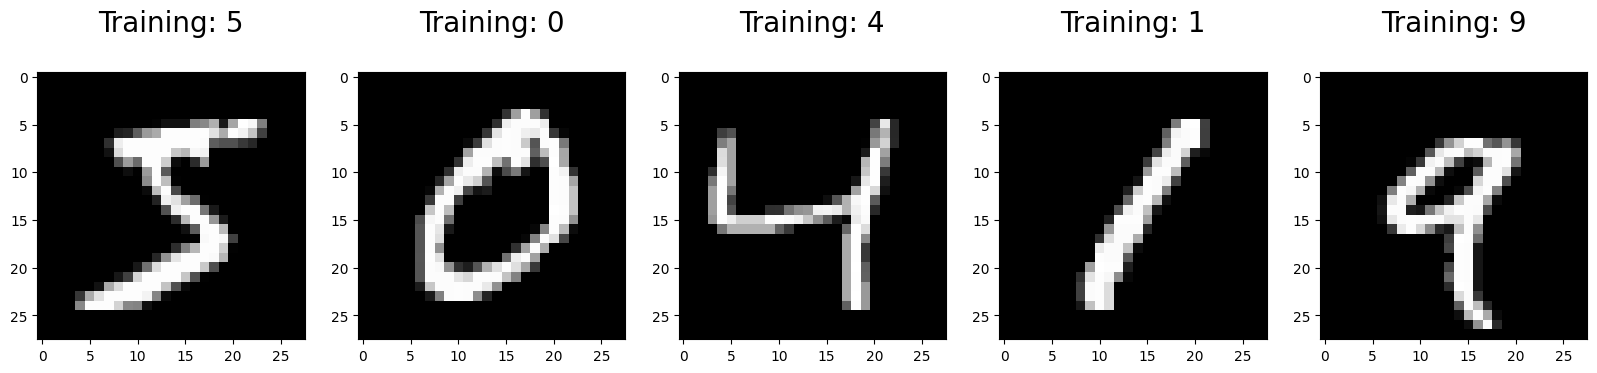

In [15]:
# JUST RUN THIS CELL
from sklearn.datasets import fetch_openml
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(42)

mnist = fetch_openml('mnist_784')

X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

X = X[:2000]
y = y[:2000]

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % label, fontsize = 20)

Ваша задача - определить какая размерность PCA из `[1,3,5,10,15,20,30,40,50,60]` оптимальна для решения задачи классификации. Обязательно установите параметр max_iter=500 при создании объекта класса `sklearn.linear_model.LogisticRegression`.

В тестовую выборку отправьте 30% объектов. В качестве random_state используйте число 42 везде, где это необходимо.

In [13]:
N_COMPONENTS = [1,3,5,10,15,20,30,40,50,60]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


best_accuracy = 0
best_n_components = None

for n in N_COMPONENTS:
    # Apply PCA
    pca = PCA(n_components=n, random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Train logistic regression
    logreg = LogisticRegression(max_iter=500, random_state=42)
    logreg.fit(X_train_pca, y_train)
    
    # Evaluate on test set
    y_pred = logreg.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update best result
    if accuracy > best_accuracy or (accuracy == best_accuracy and n < best_n_components):
        best_accuracy = accuracy
        best_n_components = n

print(f"Optimal number of components: {best_n_components}")
print(f"Best accuracy: {best_accuracy:.4f}")

Optimal number of components: 20
Best accuracy: 0.8567
